---
# Validation of best model
---
In this notebook, we will be validating and comparing different models together

Here are the three models that will be validated and for which we will be comparing the results:
1. The best model found, which is a Random Forest model, based on the accuracy score.
2. The best model based on the balanced accuracy score, which is a Decision Tree Classifier model.
3. The client's actual model from which the Churn Score is calculated.


## Results

The accuracy is not the only scores that matters. As seen during this project, the scoring method best suited to optimize a Classification model is really dependent on the goal that the model need to achieve.

In this case, the client wanted to forecast the hit event the most accurately while minimizing the missed event. Therefore, a scoring method that would have balanced the dataset and try to find the best model that tend to have 0 False Negative, while optimizing the balanced accuracy would have been the best scoring method for this project.

![Confusion Matrix](../graph/tempo.png)
</br></br>

It is a lesson learn that a model with the most accuracy does not always provide the best forecast.

We were not able to provide a better model than the pre-existing model used to produce the Churn Score and suit better the client's needs.


| Balanced Model</br>DecisionTreeClassifier              | Balanced Model</br>Random Forest                  | Client pre-existing model</br> Churn Score               |
|-----------------------|-----------------------|-----------------------|
| ![Confusion Matrix Balanced Model](../graph/ConfusionMatrix_val_BalancedModel.png) | ![Confusion Matrix Best Model](../graph/ConfusionMatrix_val_BestModel1.png) |  ![Confusion Matrix Balanced Model](../graph/ConfusionMatrix_val_ChurnScore.png) | 

</br></br></br>
    
<center>
    
####  Balanced Model (DecisionTreeClassifier)

</center>

| Metric       | Precision | Recall | F1-Score | Support |
|-------------|:---------:|:------:|:-------:|:-------:|
| **Class 0** | 0.93     | 0.72   | 0.81    | 538     |
| **Class 1** | 0.47     | 0.83   | 0.60    | 166     |
| **Accuracy**| -        | -      | 0.74    | 704     |
| **Macro Avg** | 0.70    | 0.77   | 0.71    | 704     |
| **Weighted Avg** | 0.82 | 0.74   | 0.76    | 704     |


</br></br>
<center>
    
####  Balanced Model (Random Forest)

</center>

| Metric       | Precision | Recall | F1-Score | Support |
|-------------|:---------:|:------:|:-------:|:-------:|
| **Class 0** | 0.86     | 0.90   | 0.88    | 783     |
| **Class 1** | 0.66     | 0.57   | 0.61    | 274     |
| **Accuracy**| -        | -      | 0.81    | 1057    |
| **Macro Avg** | 0.76    | 0.73   | 0.74    | 1057    |
| **Weighted Avg** | 0.81 | 0.81   | 0.81    | 1057    |


</br></br>
<center>
    
####  Client Pre-existing Model (Churn Score)

</center>

| Metric       | Precision | Recall | F1-Score | Support |
|-------------|:---------:|:------:|:-------:|:-------:|
| **Class 0** | 1.00     | 0.49   | 0.65    | 538     |
| **Class 1** | 0.37     | 1.00   | 0.55    | 166     |
| **Accuracy**| -        | -      | 0.61    | 704     |
| **Macro Avg** | 0.69    | 0.74   | 0.60    | 704     |
| **Weighted Avg** | 0.85 | 0.61   | 0.63    | 704     |
---

### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

import joblib

### Read data file

In [2]:
churn_df = pd.read_excel('../data/churn_cleaned_featEng.xlsx')
churn_df

,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Internet Service_Fiber optic,Internet Service_No,...,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Gender_Male,Phone Service_Yes,Multiple Lines_Yes,Streaming TV_Yes,Streaming Movies_Yes
0,33.964131,118.272783,2,53.85,1,0,0,0,0,0,...,0,1,0,0,1,1,1,0,0,0
1,34.059281,118.307420,2,70.70,1,0,0,1,1,0,...,0,1,0,1,0,0,1,0,0,0
2,34.048013,118.293953,8,99.65,1,0,0,1,1,0,...,0,1,0,1,0,0,1,1,1,1
3,34.062125,118.315709,28,104.80,1,0,1,1,1,0,...,0,1,0,1,0,0,1,1,1,1
4,34.039224,118.266293,49,103.70,1,0,0,1,1,0,...,0,1,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,34.341737,116.539416,72,21.15,0,0,0,0,0,1,...,1,1,0,0,0,0,1,0,0,0
7039,34.667815,117.536183,24,84.80,0,0,1,1,0,0,...,0,1,0,0,1,1,1,1,1,1
7040,34.559882,115.637164,72,103.20,0,0,1,1,1,0,...,0,1,1,0,0,0,1,1,1,1
7041,34.167800,116.864330,11,29.60,0,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,0


---

<center>
    
## Preparing data

</center>

---

### Separate X and y features

In [3]:
# Seperate X and y features
X = churn_df.drop(columns=['Churn Value'])
y = churn_df['Churn Value']

### Split dataset (training/testing/validation)

In [4]:
# Separating the dataset into a training dataset (80%) and testing+validation (20%) dataset
X_train, X_test_validation, y_train, y_test_validation = train_test_split(X, y, train_size=0.8, random_state=5)

# Separating the testing+valisation dataset into a testing dataset (10%) and a validation dataset (10%) 
X_val, X_test, y_val, y_test = train_test_split(X_test_validation, y_test_validation, test_size=0.5, random_state=5)


### Converting data subset to dataframe 

In [5]:
X_val = pd.DataFrame(X_val, columns=X.columns)

---

<center>
    
## Using best model on validation dataset

</center>

---

### Loading the best model

**Balanced model**

In [6]:
# Load the model and preprocessors (if saved)
balanced_model = joblib.load("../model/best_balanced_model.joblib")
balanced_scaler = joblib.load("../model/best_balanced_model_scaler.joblib")

**Best model based on accuracy**

In [7]:
# Load the model and preprocessors (if saved)
#best_model = joblib.load("../model/best_balanced_model.joblib")
#best_scaler = joblib.load("../model/best_balanced_model_scaler.joblib")
best_model = joblib.load("../model/randomforest_model.pkl")
best_scaler = joblib.load("../model/randomforest_scaler.pkl")

/home/abf/Dev/graph/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/abf/Dev/graph/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/abf/Dev/graph/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.1 when using version 

### Applying model's scaling to the validation dataset

**Balanced model**

In [8]:
X_val_scaled_bal = balanced_scaler.transform(X_val)

**Best model based on accuracy**

In [9]:
X_val_scaled_best = best_scaler.transform(X_val)

### Using the model to make a prediction on the validation dataset

**Balanced model**

In [10]:
y_pred_bal = balanced_model.predict(X_val_scaled_bal)

**Best model based on accuracy**

In [11]:
y_pred_best = best_model.predict(X_val_scaled_best)

---

<center>
    
## Evaluating best model's performance

</center>

---

### Accuracy Scores


**Balanced model**

In [12]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_val, y_pred_bal)))


Model accuracy score: 0.7429


In [13]:
cm_bal = confusion_matrix(y_val, y_pred_bal)
cm_bal

array([[386, 152],
       [ 29, 137]])

In [14]:
# Classification report

print(classification_report(y_val, y_pred_bal))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       538
           1       0.47      0.83      0.60       166

    accuracy                           0.74       704
   macro avg       0.70      0.77      0.71       704
weighted avg       0.82      0.74      0.76       704



**Best model based on accuracy**

In [15]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_val, y_pred_best)))


Model accuracy score: 0.8153


In [16]:
cm_best = confusion_matrix(y_val, y_pred_best)
cm_best

array([[491,  47],
       [ 83,  83]])

In [17]:
# Classification report

print(classification_report(y_val, y_pred_best))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       538
           1       0.64      0.50      0.56       166

    accuracy                           0.82       704
   macro avg       0.75      0.71      0.72       704
weighted avg       0.80      0.82      0.81       704



### Plot of Confusion Matrix

**Balanced model**

In [18]:
# Retrieve classes' name
true = balanced_model.classes_[0]
false = balanced_model.classes_[1]

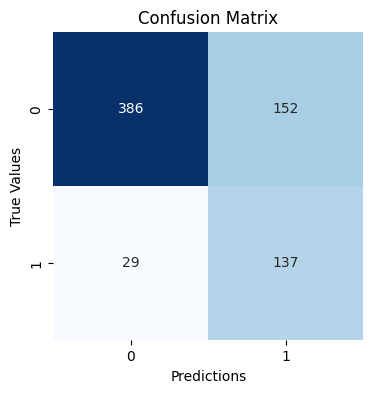

In [19]:
# Create visualization for the confusion Matrix

# Create figure and adjsut its size
plt.figure(figsize=(4,4))

# Create heatmap
ax = sns.heatmap(cm_bal, annot=True, fmt='g', cbar=False, cmap='Blues')

# Add Title
ax.set_title('Confusion Matrix')

# Adjust ticks labels
ax.set_xticklabels(labels=[true, false])
ax.set_yticklabels(labels=[true, false])

# Adjust axis labels
ax.set_xlabel(xlabel='Predictions')
ax.set_ylabel(ylabel='True Values')

# Save plot
plt.savefig('../graph/ConfusionMatrix_val_BalancedModel.png')

# Show plot
plt.show()

**Best model based on accuracy**

In [20]:
# Retrieve classes' name
true = best_model.classes_[0]
false = best_model.classes_[1]

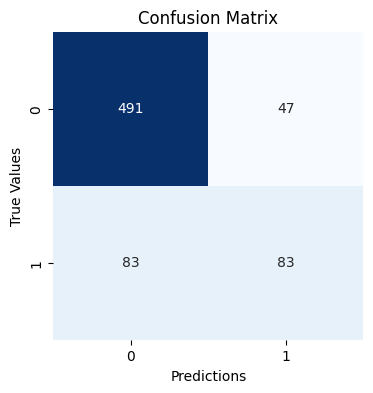

In [30]:
# Create visualization for the confusion Matrix

# Create figure and adjsut its size
plt.figure(figsize=(4,4))

# Create heatmap
ax = sns.heatmap(cm_best, annot=True, fmt='g', cbar=False, cmap='Blues')

# Add Title
ax.set_title('Confusion Matrix')

# Adjust ticks labels
ax.set_xticklabels(labels=[true, false])
ax.set_yticklabels(labels=[true, false])

# Adjust axis labels
ax.set_xlabel(xlabel='Predictions')
ax.set_ylabel(ylabel='True Values')

# Save plot
plt.savefig('../graph/ConfusionMatrix_val_BestModel1.png')

# Show plot
plt.show()

---

<center>
    
## Converting Churn Score to Churn Value

</center>

---

### Read data file

In [22]:
orig_df = pd.read_excel('../data/churn.xlsx')
orig_df.head(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


### Keep Churn Score for index matching the validation dataset

In [23]:
churn_score = orig_df['Churn Score'].iloc[X_val.index]
churn_score

608     99
1445    67
6601    31
1498    94
69      80
        ..
2433    46
4835    37
4639    62
2239    76
1791    92
Name: Churn Score, Length: 704, dtype: int64

### Converting to binary forecast 
(0 for less than or equal to 50, 1 for greater than 50)

In [24]:
threshold = 50

churn_score_bin = (churn_score >= threshold).astype(int)

churn_score_bin

608     1
1445    1
6601    0
1498    1
69      1
       ..
2433    0
4835    0
4639    1
2239    1
1791    1
Name: Churn Score, Length: 704, dtype: int64

In [25]:
cm = confusion_matrix(y_val, churn_score_bin)
cm

array([[261, 277],
       [  0, 166]])

In [26]:
# Retrieve classes' name
true = balanced_model.classes_[0]
false = balanced_model.classes_[1]

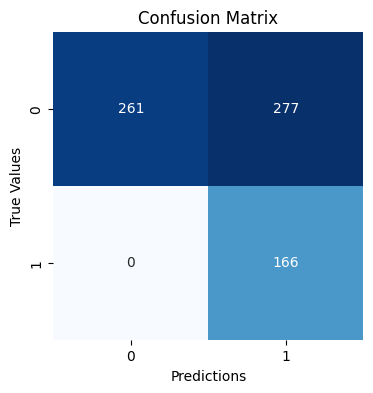

In [27]:
# Create visualization for the confusion Matrix

# Create figure and adjsut its size
plt.figure(figsize=(4,4))

# Create heatmap
ax = sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='Blues')

# Add Title
ax.set_title('Confusion Matrix')

# Adjust ticks labels
ax.set_xticklabels(labels=[true, false])
ax.set_yticklabels(labels=[true, false])

# Adjust axis labels
ax.set_xlabel(xlabel='Predictions')
ax.set_ylabel(ylabel='True Values')

# Save plot
plt.savefig('../graph/ConfusionMatrix_val_ChurnScore.png')

# Show plot
plt.show()

In [28]:
# Classification report

print(classification_report(y_val, churn_score_bin))

              precision    recall  f1-score   support

           0       1.00      0.49      0.65       538
           1       0.37      1.00      0.55       166

    accuracy                           0.61       704
   macro avg       0.69      0.74      0.60       704
weighted avg       0.85      0.61      0.63       704



---

<center>
    
##  Results Best model's performance

</center>

---

| Balanced Model</br>DecisionTreeClassifier              | Balanced Model</br>Random Forest                  | Client pre-existing model</br> Churn Score               |
|-----------------------|-----------------------|-----------------------|
| ![Confusion Matrix Balanced Model](../graph/ConfusionMatrix_val_BalancedModel.png) | ![Confusion Matrix Best Model](../graph/ConfusionMatrix_val_BestModel1.png) |  ![Confusion Matrix Balanced Model](../graph/ConfusionMatrix_val_ChurnScore.png) | 

<center>
    
####  Balanced Model (DecisionTreeClassifier)

</center>

| Metric       | Precision | Recall | F1-Score | Support |
|-------------|:---------:|:------:|:-------:|:-------:|
| **Class 0** | 0.93     | 0.72   | 0.81    | 538     |
| **Class 1** | 0.47     | 0.83   | 0.60    | 166     |
| **Accuracy**| -        | -      | 0.74    | 704     |
| **Macro Avg** | 0.70    | 0.77   | 0.71    | 704     |
| **Weighted Avg** | 0.82 | 0.74   | 0.76    | 704     |


</br></br>
<center>
    
####  Balanced Model (Random Forest)

</center>

| Metric       | Precision | Recall | F1-Score | Support |
|-------------|:---------:|:------:|:-------:|:-------:|
| **Class 0** | 0.86     | 0.91   | 0.88    | 538     |
| **Class 1** | 0.64     | 0.50   | 0.56    | 166     |
| **Accuracy**| -        | -      | 0.82    | 704     |
| **Macro Avg** | 0.75    | 0.71   | 0.72    | 704     |
| **Weighted Avg** | 0.80 | 0.82   | 0.81    | 704     |


</br></br>
<center>
    
####  Client Pre-existing Model (Churn Score)

</center>

| Metric       | Precision | Recall | F1-Score | Support |
|-------------|:---------:|:------:|:-------:|:-------:|
| **Class 0** | 1.00     | 0.49   | 0.65    | 538     |
| **Class 1** | 0.37     | 1.00   | 0.55    | 166     |
| **Accuracy**| -        | -      | 0.61    | 704     |
| **Macro Avg** | 0.69    | 0.74   | 0.60    | 704     |
| **Weighted Avg** | 0.85 | 0.61   | 0.63    | 704     |